# Credit Score Classification

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
#import test and training data
traindata=pd.read_csv(r'E:\LearningPython\Neural Networks\Credit Score\Dataset\archive\train.csv', low_memory=False)
testdata=pd.read_csv(r'E:\LearningPython\Neural Networks\Credit Score\Dataset\archive\test.csv', low_memory=False)

In [119]:
pd.set_option('display.max_columns', 35)

In [120]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Data Study

In [122]:
traindata.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [123]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

##### Change type to category

In [124]:
catcols=['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_Score', 'Payment_Behaviour', 'Payment_of_Min_Amount']
traindata[catcols]=traindata[catcols].astype('category')

# Data Cleaning

In [125]:
traindata.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [126]:
traindata.duplicated().sum()

0

In [127]:
traindata.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

#### Drop redundant columns


In [128]:
traindata=traindata.drop(['ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1)


##### Handle categorical columns

In [129]:
cl=list(traindata.select_dtypes('category').columns)

In [130]:
for col in cl:
    print(col)
    print ((traindata[col].value_counts()))
    print()

Month
April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
Name: Month, dtype: int64

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_

For credit mix replace _ with NaN 

For payment_behavior replace !@9#%8 with NaN

In [131]:
traindata['Payment_Behaviour']=traindata['Payment_Behaviour'].apply(lambda x: np.NaN if x=='!@9#%8' else x )
traindata['Credit_Mix']=traindata['Credit_Mix'].apply(lambda x: np.NaN if x=='_' else x )

In [132]:
traindata['Occupation']=traindata.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode()[0])

In [133]:
traindata=traindata[~(traindata['Occupation']=='_______')]

##### Handle Numeric Variables

In [134]:
cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt']

In [135]:
for col in cols:
    traindata[col]=traindata[col].apply(lambda x:x if x is np.NaN or not isinstance(x,str) else x.replace('_','')).replace('',np.NaN)
    traindata[col]=traindata[col].astype('float')

##### Impute and Clean

In [136]:
traindata['Monthly_Inhand_Salary']=traindata.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda v: v.mean())


In [137]:
traindata['Num_of_Delayed_Payment'] = traindata.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.mode()[0])


In [138]:
def return_null(val):
  if isinstance(val, str) and "__" in val:
    return np.NaN
  else:
    return val
traindata['Amount_invested_monthly'] = traindata['Amount_invested_monthly'].apply(return_null)
traindata['Amount_invested_monthly'] = traindata['Amount_invested_monthly'].astype('float')
traindata['Amount_invested_monthly'] = traindata.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda v: v.mean())

In [139]:
traindata['Num_Credit_Inquiries']=traindata.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mean())

In [140]:
traindata['Monthly_Balance'] = traindata['Monthly_Balance'].apply(return_null)
traindata['Monthly_Balance'] = traindata['Monthly_Balance'].astype('float')
traindata['Monthly_Balance'] =traindata.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.mean())

In [141]:
traindata['Payment_Behaviour'] = traindata.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
traindata['Credit_Mix'] = traindata.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(x.mode()[0]))
traindata['Changed_Credit_Limit'] = traindata.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda v: v.mode()[0])

C:\Users\user\AppData\Local\Temp\ipykernel_16784\340677367.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Payment_Behaviour'] = traindata.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
C:\Users\user\AppData\Local\Temp\ipykernel_16784\340677367.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this w

In [142]:
traindata['Payment_Behaviour'].isna().sum()

0

In [143]:
import re
def cal_history_age(val):
  try:
    year, month = 0, 0
    if re.search('year', val, re.IGNORECASE):
      year = int(re.findall('\d+', val)[0])
    if re.search('month', val, re.IGNORECASE):
      month = int(re.findall('\d+', val)[1])
    return year*12+month
  except:
    return np.NaN

In [144]:
traindata['Credit_History_Age']=traindata['Credit_History_Age'].apply(cal_history_age)

In [145]:
traindata['Credit_History_Age']=traindata.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
traindata['Credit_History_Age']=traindata.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
traindata['Credit_History_Age']=traindata['Credit_History_Age'].astype('float')

In [146]:
traindata.select_dtypes('category').columns

Index(['Month', 'Payment_of_Min_Amount', 'Credit_Score'], dtype='object')

In [147]:
traindata.select_dtypes('object')

,Customer_ID,Occupation,Credit_Mix,Payment_Behaviour
0,CUS_0xd40,Scientist,Good,High_spent_Small_value_payments
1,CUS_0xd40,Scientist,Good,Low_spent_Large_value_payments
2,CUS_0xd40,Scientist,Good,Low_spent_Medium_value_payments
3,CUS_0xd40,Scientist,Good,Low_spent_Small_value_payments
4,CUS_0xd40,Scientist,Good,High_spent_Medium_value_payments
...,...,...,...,...
99995,CUS_0x942c,Mechanic,Good,High_spent_Large_value_payments
99996,CUS_0x942c,Mechanic,Good,High_spent_Medium_value_payments
99997,CUS_0x942c,Mechanic,Good,High_spent_Large_value_payments
99998,CUS_0x942c,Mechanic,Good,Low_spent_Large_value_payments


In [148]:
cat_cols = ['Credit_Mix', 'Payment_Behaviour', 'Occupation']
traindata[cat_cols] = traindata[cat_cols].astype('category')


In [149]:
def clean_age(x):
  if x > 100 or x <=0:
    return np.NaN
  return x

In [150]:
traindata['Age'] = traindata['Age'].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                    else x.replace("_","")).replace("",np.nan)
traindata['Age'] = traindata['Age'].astype('float')
traindata['Age'] = traindata['Age'].apply(clean_age)
traindata['Age'] = traindata.groupby('Customer_ID')['Age'].transform(lambda v: v.mode()[0])

##### Sanity Checks

In [151]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               99992 non-null  object  
 1   Month                     99992 non-null  category
 2   Age                       99992 non-null  float64 
 3   Occupation                99992 non-null  category
 4   Annual_Income             99992 non-null  float64 
 5   Monthly_Inhand_Salary     99992 non-null  float64 
 6   Num_Bank_Accounts         99992 non-null  int64   
 7   Num_Credit_Card           99992 non-null  int64   
 8   Interest_Rate             99992 non-null  int64   
 9   Num_of_Loan               99992 non-null  float64 
 10  Delay_from_due_date       99992 non-null  int64   
 11  Num_of_Delayed_Payment    99992 non-null  float64 
 12  Changed_Credit_Limit      99992 non-null  float64 
 13  Num_Credit_Inquiries      99992 non-null  floa

In [152]:
traindata.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,99992.000000,9.999200e+04,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000
mean,33.275302,1.764263e+05,4198.524091,17.092167,22.475988,72.470878,3.010041,21.069226,13.263781,10.393515,27.672354,1426.232797,32.285141,221.134191,1403.225371,195.755021,403.121113
std,10.764549,1.429675e+06,3187.152870,117.409489,129.062455,466.440966,62.650385,14.860600,6.202003,6.512789,68.785564,1155.174399,5.116877,99.684181,8306.364896,136.847341,175.477742
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-2.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,0.000000,14.528879,92.841401
25%,24.000000,1.945549e+04,1625.597917,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.500000,3.000000,566.050000,28.052567,144.000000,30.306660,97.630668,284.538757
50%,33.000000,3.757861e+04,3097.008333,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.340000,6.000000,1166.080000,32.305784,219.000000,69.266164,152.064614,338.449369
75%,42.000000,7.279092e+04,5961.745000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.680000,10.250000,1946.810000,36.496462,302.000000,161.224249,257.568430,465.449084
max,56.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,28.000000,29.980000,602.250000,4998.070000,50.000000,404.000000,82331.000000,1005.847285,1349.264887


In [153]:
traindata['Num_Bank_Accounts'].describe()

count    99992.000000
mean        17.092167
std        117.409489
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [154]:
traindata['Num_Bank_Accounts'].replace(-1,0, inplace=True)

In [155]:
traindata['Num_Bank_Accounts'].value_counts().sort_values(ascending=False).head(20)

6       12993
7       12823
8       12765
4       12186
5       12118
3       11950
9        5443
10       5247
1        4490
0        4349
2        4304
11          9
803         7
1668        5
105         5
791         5
1033        4
43          4
34          4
1481        4
Name: Num_Bank_Accounts, dtype: int64

We can see that the number of bank accounts range from 0 to 1798, from the value counts, we can say that the value greater than 11 is certainly an error

In [156]:
traindata['Num_Bank_Accounts']=traindata['Num_Bank_Accounts'].apply(lambda x: np.nan if x>11 else x)
traindata['Num_Bank_Accounts']=traindata.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.fillna(x.mode()[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\3591632930.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Num_Bank_Accounts']=traindata.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.fillna(x.mode()[0]))


In [157]:
traindata['Num_Bank_Accounts']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    4.0
99996    4.0
99997    4.0
99998    4.0
99999    4.0
Name: Num_Bank_Accounts, Length: 99992, dtype: float64

In [158]:
traindata['Num_Credit_Card'].describe()

count    99992.000000
mean        22.475988
std        129.062455
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

In [159]:
traindata['Num_Credit_Card'].value_counts().sort_values(ascending=False).head(15)

5      18459
7      16615
6      16559
4      14030
3      13269
8       4956
10      4860
9       4643
2       2149
1       2132
11        36
0         13
849        8
852        7
159        6
Name: Num_Credit_Card, dtype: int64

We can see that the number of credit cards range from 0 to 1499, from the value counts, we can say that the value greater than 11 is certainly an error

In [160]:
traindata['Num_Credit_Card']=traindata['Num_Credit_Card'].apply(lambda x: np.nan if x>11 else x)
traindata['Num_Credit_Card']=traindata.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(x.mode()[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\3241945591.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Num_Credit_Card']=traindata.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(x.mode()[0]))


In [161]:
traindata['Num_Credit_Card'].isna().sum()

0

In [162]:
traindata['Num_Credit_Card'].describe()

count    99992.000000
mean         5.533883
std          2.067084
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

In [163]:
traindata['Interest_Rate'].describe()

count    99992.000000
mean        72.470878
std        466.440966
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

Assuming that the realistic interest value is upto 50%, imputing all other values

In [164]:
traindata['Interest_Rate']=traindata['Interest_Rate'].apply(lambda x: np.nan if x>50 else x)
traindata['Interest_Rate']=traindata.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.fillna(x.mode()[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\1369711673.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Interest_Rate']=traindata.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.fillna(x.mode()[0]))


In [165]:
traindata['Interest_Rate'].describe()

count    99992.000000
mean        14.532283
std          8.741651
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [166]:
traindata['Interest_Rate'].isna().sum()

0

In [167]:
traindata['Num_of_Loan'].describe()

count    99992.000000
mean         3.010041
std         62.650385
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [168]:
traindata['Num_of_Loan'].value_counts().sort_values(ascending=False).head(15)

 3.0       15104
 2.0       15024
 4.0       14743
 0.0       10930
 1.0       10606
 6.0        7803
 7.0        7344
 5.0        7197
-100.0      3876
 9.0        3702
 8.0        3191
 1150.0        4
 288.0         3
 430.0         3
 773.0         3
Name: Num_of_Loan, dtype: int64

In [169]:
traindata['Num_of_Loan']=traindata['Num_of_Loan'].apply(lambda x: np.nan if x<0 or x>10 else x)
traindata['Num_of_Loan']=traindata.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.fillna(x.mode()[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\2498280471.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Num_of_Loan']=traindata.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.fillna(x.mode()[0]))


In [170]:
traindata['Num_of_Loan'].isna().sum()

0

In [171]:
traindata['Num_of_Loan'].describe()

count    99992.000000
mean         3.533003
std          2.446416
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

In [172]:
traindata['Num_of_Delayed_Payment']=traindata['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x<0 else x)
traindata['Num_of_Delayed_Payment']=traindata.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.fillna(0))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\1895700395.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Num_of_Delayed_Payment']=traindata.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.fillna(0))


In [173]:
traindata['Num_of_Delayed_Payment'].describe()

count    99992.000000
mean        13.265541
std          6.197992
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [174]:
traindata['Num_of_Delayed_Payment'].isna().sum()

0

In [175]:
traindata['Total_EMI_per_month'].describe()

count    99992.000000
mean      1403.225371
std       8306.364896
min          0.000000
25%         30.306660
50%         69.266164
75%        161.224249
max      82331.000000
Name: Total_EMI_per_month, dtype: float64

In [176]:
totalemi=traindata['Total_EMI_per_month'].value_counts().sort_values(ascending=False)

In [177]:
traindata['Total_EMI_per_month']=traindata.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x: x.mode()[0])

In [178]:
traindata['Total_EMI_per_month'].describe()

count    99992.000000
mean       105.546711
std        125.814509
min          0.000000
25%         29.045533
50%         66.052460
75%        145.584994
max       1779.103254
Name: Total_EMI_per_month, dtype: float64

In [179]:
traindata["Delay_from_due_date"].describe()

count    99992.000000
mean        21.069226
std         14.860600
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [180]:
traindata.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [181]:
traindata.shape

(99992, 24)

# EDA

In [182]:
traindata.drop(['Customer_ID'], axis=1, inplace=True)

In [183]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Month                     99992 non-null  category
 1   Age                       99992 non-null  float64 
 2   Occupation                99992 non-null  category
 3   Annual_Income             99992 non-null  float64 
 4   Monthly_Inhand_Salary     99992 non-null  float64 
 5   Num_Bank_Accounts         99992 non-null  float64 
 6   Num_Credit_Card           99992 non-null  float64 
 7   Interest_Rate             99992 non-null  float64 
 8   Num_of_Loan               99992 non-null  float64 
 9   Delay_from_due_date       99992 non-null  int64   
 10  Num_of_Delayed_Payment    99992 non-null  float64 
 11  Changed_Credit_Limit      99992 non-null  float64 
 12  Num_Credit_Inquiries      99992 non-null  float64 
 13  Credit_Mix                99992 non-null  cate

In [184]:
traindata.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,98.35409,High_spent_Small_value_payments,304.555294,Good
1,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,98.35409,Low_spent_Large_value_payments,304.555294,Good
2,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,98.35409,Low_spent_Medium_value_payments,304.555294,Good
3,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,11.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,98.35409,Low_spent_Small_value_payments,304.555294,Good
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294,Good


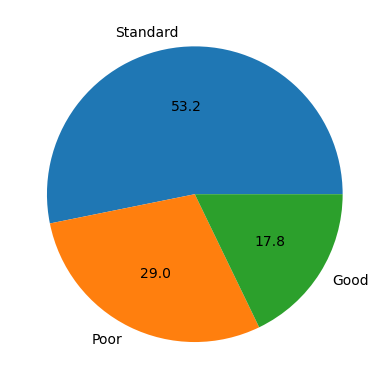

In [185]:
plt.pie(traindata['Credit_Score'].value_counts(), labels=traindata['Credit_Score'].value_counts().index, autopct='%.1f')
plt.show()

In [186]:
traindata.shape

(99992, 23)

# Data Preprocessing

In [187]:
cat_df=traindata.select_dtypes('category')

In [188]:
num_df=traindata.select_dtypes(exclude='category')

In [189]:
cols=cat_df.columns

In [190]:
cols

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [191]:
for col in cols:
    print(traindata[col].unique())

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
Categories (8, object): ['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May']
['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer', ..., 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']
Length: 15
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician', 'Scientist', 'Teacher', 'Writer']
['Good', 'Standard', 'Bad']
Categories (3, object): ['Bad', 'Good', 'Standard']
['No', 'NM', 'Yes']
Categories (3, object): ['NM', 'No', 'Yes']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'L

### Encoding

In [192]:
ohe=OneHotEncoder()

In [193]:
traindata['Credit_Mix']=traindata['Credit_Mix'].map({'Bad':0, 'Standard':1, 'Good':2})

In [196]:
traindata['Credit_Score']=pd.Categorical(traindata['Credit_Score'])
traindata['Credit_Score']=traindata['Credit_Score'].cat.codes
#encodedcreditscore=ohe.fit_transform(traindata['Credit_Score'].values.reshape(-1,1)).toarray()
#encodeddf=pd.DataFrame(encodedcreditscore, columns=ohe.get_feature_names_out(['Credit_Score']))
#traindata=pd.concat([traindata, encodeddf], axis=1)


In [197]:
traindata.drop(['Credit_Score'], axis=1, inplace=True)

In [198]:
traindata['Credit_Mix']=traindata['Credit_Mix'].astype('int')


In [199]:
LE=LabelEncoder()

In [200]:
OccupationCounts=traindata['Occupation'].value_counts()

In [202]:
traindata['Occupation']=traindata['Occupation'].map(OccupationCounts)

In [203]:
traindata['Month']=LE.fit_transform(traindata['Month'])

In [204]:
dummy_df=pd.get_dummies(traindata[['Payment_Behaviour', 'Payment_of_Min_Amount']], drop_first=True)

In [205]:
traindata=pd.concat([traindata, dummy_df], axis=1)
traindata.drop(['Payment_Behaviour', 'Payment_of_Min_Amount'], axis=1, inplace=True)

In [206]:
traindata.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,3,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,2,809.98,26.822620,265.0,49.574949,98.35409,304.555294,0,1,0,0,0,1,0
1,2,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,4.0,11.27,4.0,2,809.98,31.944960,265.0,49.574949,98.35409,304.555294,0,0,1,0,0,1,0
2,6,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,2,809.98,28.609352,267.0,49.574949,98.35409,304.555294,0,0,0,1,0,1,0
3,0,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,11.27,4.0,2,809.98,31.377862,268.0,49.574949,98.35409,304.555294,0,0,0,0,1,1,0
4,7,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,2,809.98,24.797347,269.0,49.574949,98.35409,304.555294,1,0,0,0,0,1,0


In [207]:
traindata.dtypes

Month                                                   int32
Age                                                   float64
Occupation                                              int64
Annual_Income                                         float64
Monthly_Inhand_Salary                                 float64
Num_Bank_Accounts                                     float64
Num_Credit_Card                                       float64
Interest_Rate                                         float64
Num_of_Loan                                           float64
Delay_from_due_date                                     int64
Num_of_Delayed_Payment                                float64
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Credit_Mix                                              int32
Outstanding_Debt                                      float64
Credit_Utilization_Ratio                              float64
Credit_H

### Data Splitting

In [208]:
X=traindata

In [209]:
y=encodedcreditscore

In [210]:
sm=SMOTE()
X,y= sm.fit_resample(X,y)

In [211]:
X.shape

(159507, 27)

In [213]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

### Scaling

In [214]:
num_columns=num_df.columns

In [215]:
scalar = PowerTransformer()

In [216]:
X_train[num_columns]=scalar.fit_transform(X_train[num_columns])

In [217]:
import numpy as np

In [218]:
X_test[num_columns]=scalar.transform(X_test[num_columns])

# Model Building

### XGBClassifier

In [ ]:
xgb_cl=XGBClassifier(learning_rate=0.1,
 n_estimators=250,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 n_jobs=-1,
 tree_method='gpu_hist')

In [ ]:
%%time
xgb_cl.fit(X_train, y_train)

Wall time: 14.3 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
ytestpred=xgb_cl.predict(X_test)

In [ ]:
accuracy_score(y_test, ytestpred)

0.8690050780515328

In [ ]:
print(classification_report(y_test, ytestpred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10534
           1       0.85      0.77      0.81     10722
           2       0.89      0.94      0.91     10646

    accuracy                           0.87     31902
   macro avg       0.87      0.87      0.87     31902
weighted avg       0.87      0.87      0.87     31902



In [ ]:
a = {'Poor': 0, 'Standard': 1, 'Good': 2}
labels=list(a.keys())

In [ ]:
cm=confusion_matrix(y_test, ytestpred)

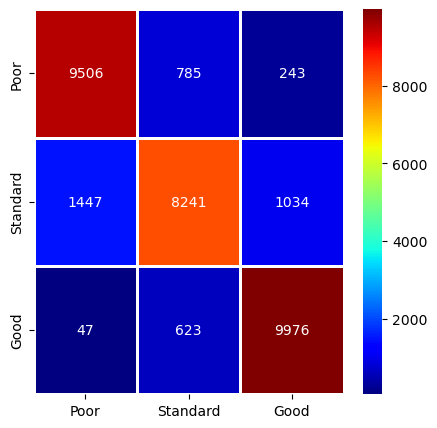

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='jet', fmt='d', linewidths=1, xticklabels=labels, yticklabels=labels)
plt.show()

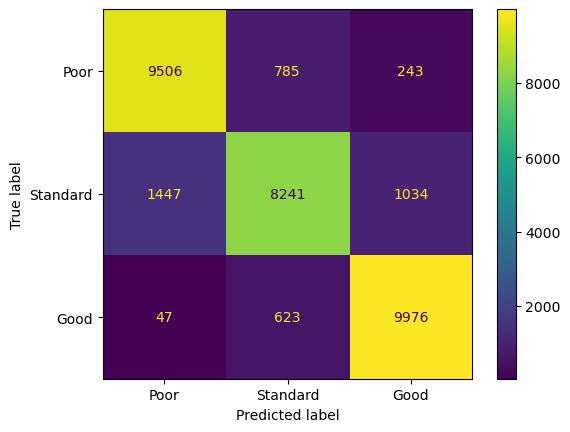

In [ ]:
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()

In [ ]:
imp=xgb_cl.feature_importances_


In [ ]:
def plot_feature_importances(coefficients, columns):
    features=pd.DataFrame(coefficients*100, columns).reset_index()
    features.columns=['Features', 'Importances']
    features=features.sort_values(by='Importances', ascending=False)
    sns.barplot(x='Importances', y='Features', data=features)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    return features

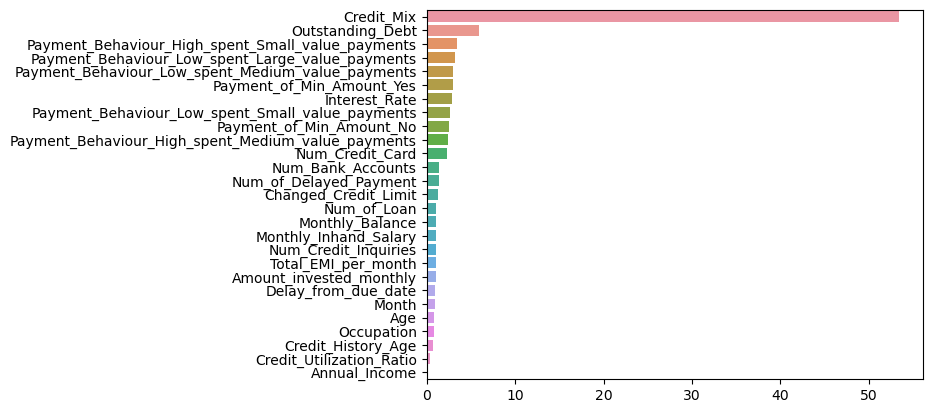

In [ ]:
top_features=plot_feature_importances(xgb_cl.feature_importances_, X_train.columns)